
Question 2: Polynomial Regression <br>

Description:<br>
Perform polynomial regression to fit a non-linear dataset.

--- Question 2: Implementing Polynomial Regression ---
INFO: Generated synthetic non-linear dataset (cubic-like relationship).
  Feature (X) shape: (150, 1)
  Target (y) shape: (150, 1)


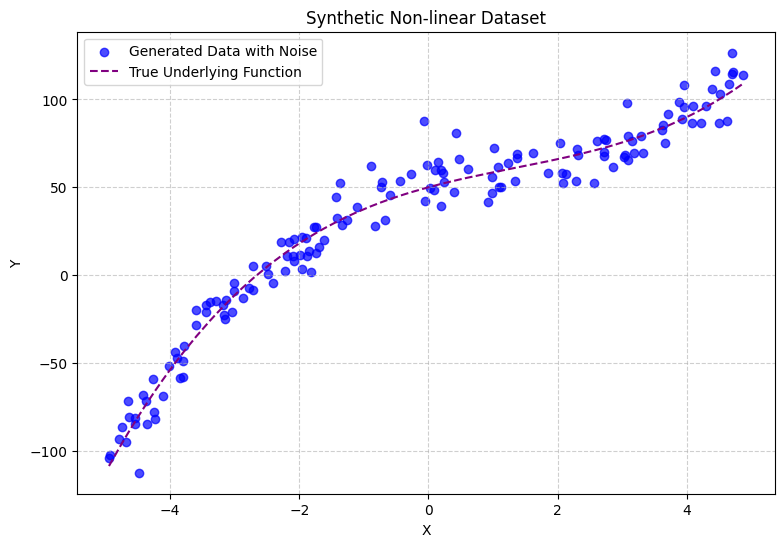


INFO: Data split into training and testing sets:
  X_train shape: (120, 1), y_train shape: (120, 1)
  X_test shape: (30, 1), y_test shape: (30, 1)

INFO: Transformed features using PolynomialFeatures (Degree=3).
  Original X_train shape: (120, 1)
  Transformed X_train_poly shape: (120, 3)
  Example of original X_train[0]: [-2.07855351]
  Example of transformed X_train_poly[0]: [-2.08  4.32 -8.98]

INFO: Linear Regression Model trained successfully on polynomial features.
  Model Intercept (c): 50.66
  Model Coefficients: [ 9.63 -1.95  0.54]

INFO: Predictions made on the test set.

--- Model Evaluation (Polynomial Regression) ---
Mean Absolute Error (MAE): 5.9488
Mean Squared Error (MSE): 48.6979
Root Mean Squared Error (RMSE): 6.9784
R-squared (R²): 0.9856


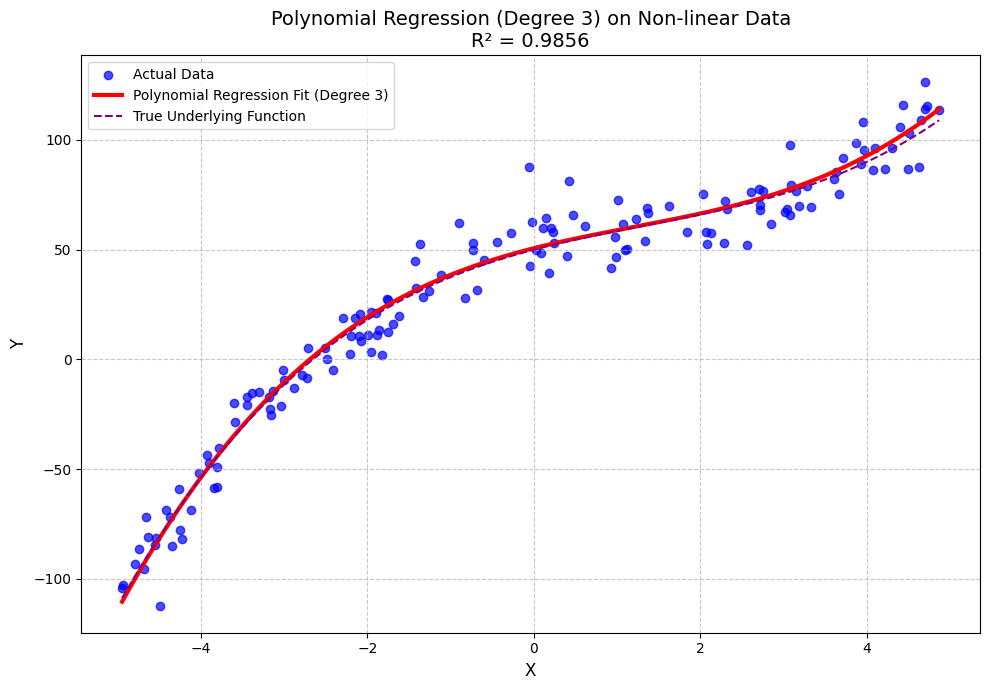

ERROR: Error during example prediction: unsupported format string passed to numpy.ndarray.__format__

----------------------------------------------------------------------------------------------------
Polynomial Regression is effective for modeling non-linear relationships. The 'degree' parameter
controls the complexity of the curve. A higher degree allows for more complex fits but increases
the risk of overfitting, especially with limited data.


In [3]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import NotFittedError

print("--- Question 2: Implementing Polynomial Regression ---")

# --- Configuration ---
# Degree of the polynomial to fit (e.g., 2 for quadratic, 3 for cubic)
# Try changing this to 1 (linear), 2, 3, or even higher to see the effect.
POLYNOMIAL_DEGREE = 3

# --- 1. Generate a Synthetic Non-linear Dataset ---
# We'll create data that follows a cubic-like pattern with some noise.
np.random.seed(42) # for reproducibility

n_samples = 150
# Feature X ranging from -5 to 5
X = np.random.uniform(-5, 5, n_samples).reshape(-1, 1)

# True non-linear relationship (e.g., cubic + quadratic)
# y = 0.5*x^3 - 2*x^2 + 10*x + 50 + noise
y_true = 0.5 * X**3 - 2 * X**2 + 10 * X + 50
noise = np.random.normal(0, 10, n_samples).reshape(-1, 1) # Add noise
y = y_true + noise

print("INFO: Generated synthetic non-linear dataset (cubic-like relationship).")
print(f"  Feature (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")

# Optional: Visualize the generated data
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='blue', label='Generated Data with Noise', alpha=0.7)
plt.plot(np.sort(X.flatten()), np.sort(y_true.flatten()), color='purple', linestyle='--', label='True Underlying Function')
plt.title('Synthetic Non-linear Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 2. Data Preparation and Split ---
try:
    # No specific column names needed for synthetic data, X and y are already defined.
    # Ensure they are numerical and handle potential NaNs (though not expected here)
    if not np.issubdtype(X.dtype, np.number) or not np.issubdtype(y.dtype, np.number):
        raise TypeError("ERROR: X or y data is not numerical. Please check data types.")

    # Drop NaNs if any, though not expected for synthetic data
    clean_indices = ~np.isnan(X).any(axis=1) & ~np.isnan(y).flatten()
    if not np.all(clean_indices):
        X = X[clean_indices]
        y = y[clean_indices]
        print(f"INFO: Dropped {n_samples - X.shape[0]} rows due to missing values.")

    if X.shape[0] == 0:
        raise ValueError("ERROR: Data is empty after cleaning. Cannot proceed.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nINFO: Data split into training and testing sets:")
    print(f"  X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"  X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

except Exception as e:
    print(f"CRITICAL ERROR during data preparation or splitting: {e}")
    X_train, X_test, y_train, y_test = None, None, None, None

if X_train is not None:
    # --- 3. Polynomial Feature Transformation ---
    try:
        # Create polynomial features transformer
        # degree: The degree of the polynomial features.
        # include_bias=False: Do not include the intercept term, as LinearRegression will handle it.
        poly_features = PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=False)

        # Fit and transform the training data
        X_train_poly = poly_features.fit_transform(X_train)
        # Transform the test data (DO NOT fit again on test data)
        X_test_poly = poly_features.transform(X_test)

        print(f"\nINFO: Transformed features using PolynomialFeatures (Degree={POLYNOMIAL_DEGREE}).")
        print(f"  Original X_train shape: {X_train.shape}")
        print(f"  Transformed X_train_poly shape: {X_train_poly.shape}")
        print(f"  Example of original X_train[0]: {X_train[0].flatten()}")
        print(f"  Example of transformed X_train_poly[0]: {X_train_poly[0].round(2)}")

    except Exception as e:
        print(f"CRITICAL ERROR during polynomial feature transformation: {e}")
        X_train_poly, X_test_poly = None, None

    if X_train_poly is not None:
        # --- 4. Create and Train the Linear Regression Model on Polynomial Features ---
        model_poly = LinearRegression()
        try:
            model_poly.fit(X_train_poly, y_train)
            print("\nINFO: Linear Regression Model trained successfully on polynomial features.")
            print(f"  Model Intercept (c): {model_poly.intercept_[0]:.2f}")
            # Coefficients correspond to the polynomial features (e.g., x, x^2, x^3)
            print(f"  Model Coefficients: {model_poly.coef_.flatten().round(2)}")
        except Exception as e:
            print(f"ERROR: Error during model training: {e}")
            model_poly = None

        if model_poly is not None:
            # --- 5. Make Predictions on the Test Set ---
            y_pred_poly = None
            try:
                y_pred_poly = model_poly.predict(X_test_poly)
                print("\nINFO: Predictions made on the test set.")
            except NotFittedError:
                print("ERROR: Polynomial regression model has not been fitted yet. Cannot make predictions.")
            except Exception as e:
                print(f"ERROR: Error making predictions: {e}")

            if y_pred_poly is not None:
                # --- 6. Evaluate the Model ---
                try:
                    mae_poly = mean_absolute_error(y_test, y_pred_poly)
                    mse_poly = mean_squared_error(y_test, y_pred_poly)
                    rmse_poly = np.sqrt(mse_poly)
                    r2_poly = r2_score(y_test, y_pred_poly)

                    print("\n--- Model Evaluation (Polynomial Regression) ---")
                    print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
                    print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
                    print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
                    print(f"R-squared (R²): {r2_poly:.4f}")

                except Exception as e:
                    print(f"ERROR: Error during model evaluation: {e}")

                # --- 7. Visualize the Results ---
                try:
                    plt.figure(figsize=(10, 7))

                    # Plot original data points (all data, not just test, for better context)
                    plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)

                    # To plot the smooth polynomial curve, create a sorted range of X values
                    # and transform them using the *same* poly_features object, then predict.
                    X_range_for_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
                    X_range_poly_transformed = poly_features.transform(X_range_for_plot)
                    y_range_pred = model_poly.predict(X_range_poly_transformed)

                    plt.plot(X_range_for_plot, y_range_pred, color='red', linewidth=3,
                             label=f'Polynomial Regression Fit (Degree {POLYNOMIAL_DEGREE})')

                    # Optionally plot the true underlying function for comparison
                    plt.plot(np.sort(X.flatten()), np.sort(y_true.flatten()), color='purple', linestyle='--', label='True Underlying Function')


                    plt.title(f'Polynomial Regression (Degree {POLYNOMIAL_DEGREE}) on Non-linear Data\n'
                              f'R² = {r2_poly:.4f}', fontsize=14)
                    plt.xlabel('X', fontsize=12)
                    plt.ylabel('Y', fontsize=12)
                    plt.legend()
                    plt.grid(True, linestyle='--', alpha=0.7)
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                    print(f"ERROR: Error during plotting: {e}")

                # --- 8. Example Prediction (Optional) ---
                try:
                    # Predict for a specific new X value (e.g., X = 2.5)
                    new_X_value = np.array([[2.5]])
                    # Remember to transform the new input before prediction
                    new_X_value_poly = poly_features.transform(new_X_value)
                    predicted_Y = model_poly.predict(new_X_value_poly)
                    print(f"\nINFO: Predicted Y for X = {new_X_value[0,0]}: {predicted_Y[0]:,.2f}")
                except NotFittedError:
                    print("ERROR: Cannot make example prediction: Model was not successfully fitted.")
                except Exception as e:
                    print(f"ERROR: Error during example prediction: {e}")
            else:
                print("\nSkipping evaluation and visualization due to prediction error.")
        else:
            print("\nSkipping prediction, evaluation, and visualization as model training failed.")
    else:
        print("\nSkipping model training and subsequent steps due to polynomial feature transformation error.")
else:
    print("\nSkipping all steps due to data preparation or splitting errors.")

print("\n----------------------------------------------------------------------------------------------------")
print("Polynomial Regression is effective for modeling non-linear relationships. The 'degree' parameter")
print("controls the complexity of the curve. A higher degree allows for more complex fits but increases")
print("the risk of overfitting, especially with limited data.")

In [4]:
import pandas as pd

# Specify the path to your CSV file
# Replace 'your_dataset.csv' with the actual name of your CSV file
csv_file_path = 'your_dataset.csv'

try:
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Display the first few rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file 'your_dataset.csv' was not found.
